In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

In [66]:
df_weather = pd.read_csv("export-nice.csv", sep=",",  error_bad_lines=False, skiprows = 3)
df_moon = pd.read_csv("moon-phases-2009-2018-Europe_Monaco.csv", sep=",",  error_bad_lines=False)
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])
df_moon['date'] = pd.to_datetime(df_moon['date'])

In [67]:
df_weather.head(3)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,OPINION
0,2009-01-01,10,6,21,5,9,7,2.5,84,9.875,1024,23.75,10,6,4,113,113,113,météo défavorable
1,2009-01-02,11,4,14,2,10,4,0.0,72,10.000,1022,11.50,11,7,1,113,113,113,météo très défavorable
2,2009-01-03,7,5,23,2,7,5,0.0,73,10.000,1019,5.75,7,2,0,113,113,113,météo très défavorable


In [68]:
df_moon.head(3)

,date,time,phase,phaseid,datetime,timestamp,friendlydate
0,2009-01-04,12:56 PM,First Quarter,2,2009-01-04 12:56:00,1231070160,"January 4, 2009"
1,2009-01-11,04:27 AM,Full Moon,3,2009-01-11 04:27:00,1231644420,"January 11, 2009"
2,2009-01-18,03:46 AM,Last Quarter,4,2009-01-18 03:46:00,1232246760,"January 18, 2009"


In [69]:
df_moon.dtypes

date            datetime64[ns]
time                    object
phase                   object
phaseid                  int64
datetime                object
timestamp                int64
friendlydate            object
dtype: object

In [70]:
df_weather.dtypes

DATE                      datetime64[ns]
MAX_TEMPERATURE_C                  int64
MIN_TEMPERATURE_C                  int64
WINDSPEED_MAX_KMH                  int64
TEMPERATURE_MORNING_C              int64
TEMPERATURE_NOON_C                 int64
TEMPERATURE_EVENING_C              int64
PRECIP_TOTAL_DAY_MM              float64
HUMIDITY_MAX_PERCENT               int64
VISIBILITY_AVG_KM                float64
PRESSURE_MAX_MB                    int64
CLOUDCOVER_AVG_PERCENT           float64
HEATINDEX_MAX_C                    int64
DEWPOINT_MAX_C                     int64
WINDTEMP_MAX_C                     int64
WEATHER_CODE_MORNING               int64
WEATHER_CODE_NOON                  int64
WEATHER_CODE_EVENING               int64
OPINION                           object
dtype: object

In [71]:
df = pd.DataFrame(df_moon['date'])
df['phaseid'] = df_moon['phaseid']
df['phase'] = df_moon['phase']

In [72]:
df['Precipitation'] = 0

In [73]:
df.head(3)

,date,phaseid,phase,Precipitation
0,2009-01-04,2,First Quarter,0
1,2009-01-11,3,Full Moon,0
2,2009-01-18,4,Last Quarter,0


In [74]:
df_weather.loc[df_weather['DATE'] == "2009-01-01", ['OPINION']]

,OPINION
0,météo défavorable


In [75]:
opinion = np.array([])
precipitation = np.array([])
coverage = np.array([])
for i in df['date']:
    opinion = np.append(opinion, df_weather.loc[df_weather['DATE'] == i, ['OPINION']])
    precipitation = np.append(precipitation, df_weather.loc[df_weather['DATE'] == i, ['PRECIP_TOTAL_DAY_MM']])
    coverage = np.append(coverage, df_weather.loc[df_weather['DATE'] == i, ['CLOUDCOVER_AVG_PERCENT']])
len(opinion)

495

In [76]:
df['OPINION'] = opinion
df['Precipitation'] = precipitation
df['Coverage'] = coverage

In [77]:
df.head()

,date,phaseid,phase,Precipitation,OPINION,Coverage
0,2009-01-04,2,First Quarter,0.0,météo très défavorable,3.000
1,2009-01-11,3,Full Moon,0.0,météo défavorable,7.750
2,2009-01-18,4,Last Quarter,0.2,météo correcte,22.500
3,2009-01-26,1,New Moon,32.7,météo très défavorable,64.125
4,2009-02-03,2,First Quarter,2.2,météo défavorable,44.250


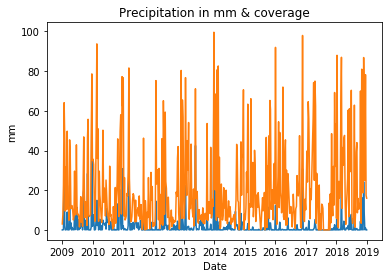

In [78]:
plt.plot(df['date'], df['Precipitation'])
plt.plot(df['date'], df['Coverage'])
plt.title('Precipitation in mm & coverage')
plt.xlabel('Date')
plt.ylabel('mm')
plt.show()

In [79]:
np.average(df['Precipitation'])

2.656161616161616

In [80]:
np.average(df.loc[df['phaseid'] == i, ['Precipitation']])

C:\Users\Carcouss\Anaconda3\lib\site-packages\numpy\lib\function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Carcouss\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [81]:
np.std(df.loc[df['phaseid'] == i, ['Precipitation']])

Precipitation   NaN
dtype: float64

In [82]:
for i in range(1,5):
    a = np.array(df.loc[df['phaseid'] == i, ['Precipitation']])
    b = np.array(df.loc[df['phaseid'] == i, ['Coverage']])
    print("Phase {} average = {} mm, standard deviation = {}".format(i, 
                        np.average(a), np.std(a)))
    print("Coverage = {} %".format( 
                        np.average(b)))


Phase 1 average = 1.9853658536585368 mm, standard deviation = 4.897347596815778
Coverage = 19.395664227642275 %
Phase 2 average = 3.0564516129032264 mm, standard deviation = 8.886917186874669
Coverage = 20.101814516129032 %
Phase 3 average = 2.7201612903225807 mm, standard deviation = 8.280427562580734
Coverage = 21.405241935483872 %
Phase 4 average = 2.857258064516129 mm, standard deviation = 8.05892786220608
Coverage = 22.090725806451612 %


In [83]:
np.std(df['Precipitation'])

7.704048352936619

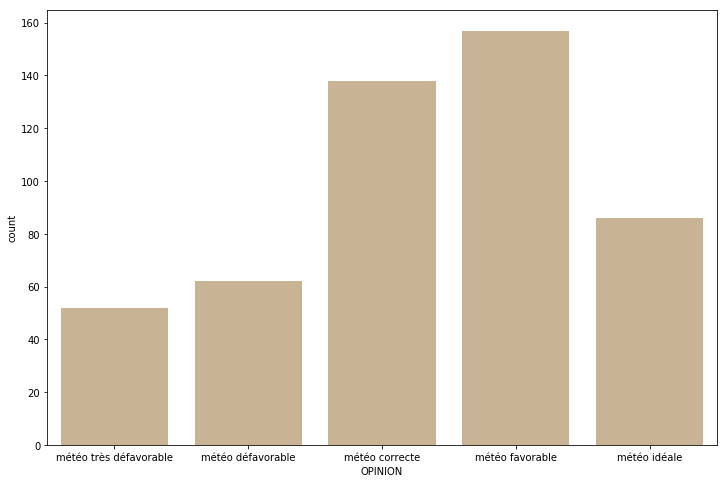

In [84]:
import seaborn as sns

fig = plt.gcf()
fig.set_size_inches( 12, 8)
sns.countplot(df['OPINION'], color='tan')

In [85]:
df.loc[df['OPINION'] == "météo favorable"].head(5)

,date,phaseid,phase,Precipitation,OPINION,Coverage
10,2009-03-18,4,Last Quarter,0.1,météo favorable,11.625
16,2009-05-01,2,First Quarter,1.3,météo favorable,12.250
17,2009-05-09,3,Full Moon,0.1,météo favorable,9.500
18,2009-05-17,4,Last Quarter,0.6,météo favorable,5.000
21,2009-06-07,3,Full Moon,0.3,météo favorable,7.625


In [152]:
phase = [0, 'New Moon', 'First Quarter', 'Full Moon', 'Last Quarter']
for i in range(1, 5):
    a = np.array(df.loc[df['phaseid'] == i, ['OPINION']]) 
    b = np.count_nonzero(a == 'météo favorable')
    print('Bonne météo #{} phase {} {}, precipitation = {}'.format(b, i, phase[i], 
                np.round(np.mean(df['Precipitation'].loc[(df['phaseid'] == i) & (df['OPINION'] == "météo favorable")]),2 )))
    print("Coverage = {}".format(np.round(np.mean(df['Coverage'].loc[(df['phaseid'] == i) 
                                                                     & (df['OPINION'] == "météo favorable")]),2 )))
print('--------------------------------------------------')
phase = [0, 'New Moon', 'First Quarter', 'Full Moon', 'Last Quarter']
for i in range(1, 5):
    a = np.array(df.loc[df['phaseid'] == i, ['OPINION']]) 
    c = np.count_nonzero(a == 'météo idéale')
    #d = np.mean(df.loc[df['phaseid'] == i, ['precipitation']])
    print('Très Bonne météo #{} phase {} {}, precipitation = {}'.format(c, i, phase[i], 
                np.round(np.mean(df['Precipitation'].loc[(df['phaseid'] == i) & (df['OPINION'] == "météo idéale")]),2 )))
    print("Coverage = {}".format(np.round(np.mean(df['Coverage'].loc[(df['phaseid'] == i) 
                                                                     & (df['OPINION'] == "météo idéale")]),2 )))
print('--------------------------------------------------')
for i in range(1, 5):
    a = np.array(df.loc[df['phaseid'] == i, ['OPINION']]) 
    b = np.count_nonzero(a == 'météo correcte')
    print('Météo correcte #{} phase {} {}, precipitation = {}'.format(b, i, phase[i], 
                np.round(np.mean(df['Precipitation'].loc[(df['phaseid'] == i) & (df['OPINION'] == "météo correcte")]),2 )))
    print("Coverage = {}".format(np.round(np.mean(df['Coverage'].loc[(df['phaseid'] == i) 
                                                                     & (df['OPINION'] == "météo correcte")]),2 )))
print('--------------------------------------------------')
for i in range(1, 5):
    a = np.array(df.loc[df['phaseid'] == i, ['OPINION']]) 
    b = np.count_nonzero(a == 'météo défavorable')
    print('Mauvaise météo #{} phase {} {}, precipitation = {}'.format(b , i, phase[i], 
                np.round(np.mean(df['Precipitation'].loc[(df['phaseid'] == i) 
                                                         & (df['OPINION'] == "météo défavorable")]),2 )))
    print("Coverage = {}".format(np.round(np.mean(df['Coverage'].loc[(df['phaseid'] == i) 
                                                                     & (df['OPINION'] == "météo défavorable")]),2 )))
print('--------------------------------------------------')
for i in range(1, 5):
    a = np.array(df.loc[df['phaseid'] == i, ['OPINION']]) 
    c = np.count_nonzero(a == 'météo très défavorable')
    print('Très Mauvaise météo #{} phase {} {}, precipitation = {}'.format(c, i, phase[i], 
                np.round(np.mean(df['Precipitation'].loc[(df['phaseid'] == i) 
                                                         & (df['OPINION'] == "météo très défavorable")]),2 )))
    print("Coverage = {}".format(np.round(np.mean(df['Coverage'].loc[(df['phaseid'] == i) 
                                                                     & (df['OPINION'] == "météo très défavorable")]),2 )))


Bonne météo #44 phase 1 New Moon, precipitation = 1.12
Coverage = 12.06
Bonne météo #43 phase 2 First Quarter, precipitation = 0.78
Coverage = 12.37
Bonne météo #33 phase 3 Full Moon, precipitation = 0.94
Coverage = 14.68
Bonne météo #37 phase 4 Last Quarter, precipitation = 1.23
Coverage = 11.46
--------------------------------------------------
Très Bonne météo #19 phase 1 New Moon, precipitation = 0.19
Coverage = 8.13
Très Bonne météo #21 phase 2 First Quarter, precipitation = 0.26
Coverage = 6.41
Très Bonne météo #25 phase 3 Full Moon, precipitation = 0.27
Coverage = 6.23
Très Bonne météo #21 phase 4 Last Quarter, precipitation = 0.32
Coverage = 6.71
--------------------------------------------------
Météo correcte #34 phase 1 New Moon, precipitation = 1.14
Coverage = 19.8
Météo correcte #33 phase 2 First Quarter, precipitation = 2.23
Coverage = 19.88
Météo correcte #38 phase 3 Full Moon, precipitation = 1.41
Coverage = 23.62
Météo correcte #33 phase 4 Last Quarter, precipitation =

In [122]:
from datetime import datetime, timedelta
df['date + 1'] = df['date'] + timedelta(1)
df['date -1'] = df['date'] - timedelta(1)

In [123]:
df.head(3)

,date,phaseid,phase,Precipitation,OPINION,Coverage,date + 1,date -1
0,2009-01-04,2,First Quarter,0.0,météo très défavorable,3.00,2009-01-05,2009-01-03
1,2009-01-11,3,Full Moon,0.0,météo défavorable,7.75,2009-01-12,2009-01-10
2,2009-01-18,4,Last Quarter,0.2,météo correcte,22.50,2009-01-19,2009-01-17


In [124]:
precipitation = np.array([])
coverage = np.array([])
for i in df['date -1']:
    precipitation = np.append(precipitation, df_weather.loc[df_weather['DATE'] == i, ['PRECIP_TOTAL_DAY_MM']])
    coverage = np.append(coverage, df_weather.loc[df_weather['DATE'] == i, ['CLOUDCOVER_AVG_PERCENT']])
df['Precipitation - 1'] = precipitation
df['Coverage - 1'] = coverage
len(precipitation)

495

In [125]:
precipitation = np.array([])
coverage = np.array([])
for i in df['date + 1']:
    precipitation = np.append(precipitation, df_weather.loc[df_weather['DATE'] == i, ['PRECIP_TOTAL_DAY_MM']])
    coverage = np.append(coverage, df_weather.loc[df_weather['DATE'] == i, ['CLOUDCOVER_AVG_PERCENT']])
df['Precipitation + 1'] = precipitation
df['Coverage + 1'] = coverage
len(precipitation)

495

In [126]:
df.head(3)

,date,phaseid,phase,Precipitation,OPINION,Coverage,date + 1,date -1,Precipitation - 1,Coverage - 1,Precipitation + 1,Coverage + 1
0,2009-01-04,2,First Quarter,0.0,météo très défavorable,3.00,2009-01-05,2009-01-03,0.0,5.750,0.0,22.750
1,2009-01-11,3,Full Moon,0.0,météo défavorable,7.75,2009-01-12,2009-01-10,0.1,14.625,0.0,4.375
2,2009-01-18,4,Last Quarter,0.2,météo correcte,22.50,2009-01-19,2009-01-17,0.0,28.000,8.4,64.500


In [127]:
df['Mean Cov'] = (df['Coverage - 1'] + df['Coverage'] + df['Coverage + 1']) / 3
df['Mean Prec'] = (df['Precipitation - 1'] + df['Precipitation'] + df['Precipitation + 1']) / 3

In [128]:
for i in range(1,5):
    a = np.array(df.loc[df['phaseid'] == i, ['Mean Prec']])
    b = np.array(df.loc[df['phaseid'] == i, ['Mean Cov']])
    print("Phase {} average = {} mm, standard deviation = {}".format(i, 
                        round(np.average(a), 2), round(np.std(a), 2)))
    print("Coverage = {} %".format( 
                        round(np.average(b), 2)))
print('Mean Coverage {}'.format(round(np.mean(df['Coverage']),2)))
print('Std deviation {}'.format(round(np.std(df['Coverage']),2)))

Phase 1 average = 2.05 mm, standard deviation = 3.49
Coverage = 19.9 %
Phase 2 average = 2.69 mm, standard deviation = 5.25
Coverage = 20.74 %
Phase 3 average = 2.31 mm, standard deviation = 4.64
Coverage = 20.04 %
Phase 4 average = 3.14 mm, standard deviation = 6.62
Coverage = 21.35 %
Mean Coverage 20.75
Std deviation 21.26


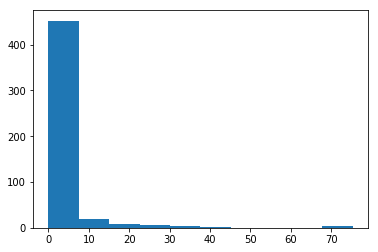

In [129]:
plt.hist(df['Precipitation'])
plt.show()

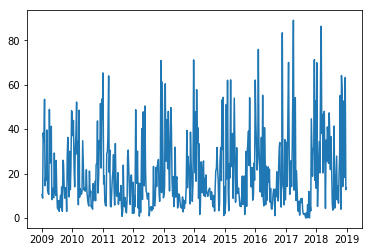

In [130]:
plt.plot(df['date'], df['Mean Cov'])
plt.show()

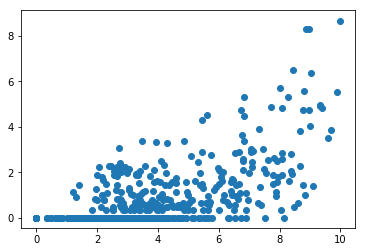

In [131]:
plt.scatter(np.sqrt(df['Coverage']), np.sqrt(df['Precipitation']))
plt.show()

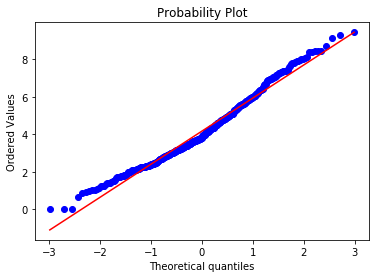

In [132]:
import pylab 
import scipy.stats as stats

stats.probplot(np.sqrt(df['Mean Cov']), dist="norm", plot=pylab)
pylab.show()

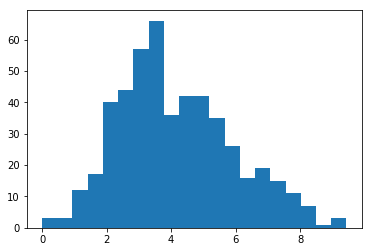

In [155]:
plt.hist(np.sqrt(df['Mean Cov']), bins=20)
plt.show()

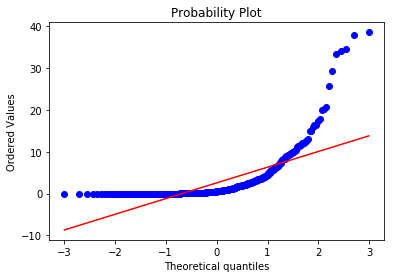

In [134]:
stats.probplot(df['Mean Prec'], dist="norm", plot=pylab)
pylab.show()